In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SALib.analyze.delta import analyze as delta_analyze
from SALib.analyze.rbd_fast import analyze as rbd_fast_analyze
from SALib.sample.latin import sample as latin_sample

from helpers.helpers import design_point_executor

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:
num_samples = 100  # Latin Hypercube samples
par_list = ['beta', 'asymp_factor', 'rel_severe_prob', 'rel_death_prob']
k = len(par_list)  # number of covasim variables to analyse
problem = {
    'num_vars': k,
    'names': par_list,
    'bounds': [[0.005, 0.005 * 6],
               [0.5, 0.5 * 6],
               [0.75, 0.75 * 6],
               [0.75, 0.75 * 6]]
}

In [3]:
# sample design points
X = latin_sample(problem, num_samples)
print(f"Created {len(X)} design points")
print("First design point: ", X[0], "\n Last design point: ", X[-1])
executor = design_point_executor(par_list)
results = map(executor, X)
# execute the simulations
Y = np.fromiter(results, dtype=np.float64)
print("Average number of dead people over 10 simulation runs:")
print("For first design point:", Y[0], "\n Last design point:", Y[-1])

Created 100 design points
First design point:  [0.00938976 2.54279189 1.63089604 0.9255386 ] 
 Last design point:  [0.00674854 1.40885867 4.29869811 3.252052  ]
Average number of dead people over 10 simulation runs:
For first design point: 72.3 
 Last design point: 49.5


                       S1   S1_conf
beta             0.415621  0.290685
asymp_factor     0.066794  0.335682
rel_severe_prob  0.226657  0.336032
rel_death_prob   0.045249  0.351219


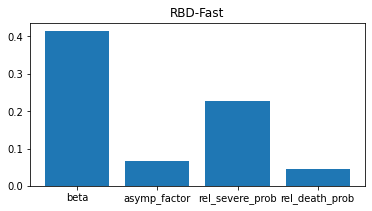

In [4]:
# apply RBD-Fast
Si = rbd_fast_analyze(problem, X, Y, print_to_console=True)
# plot first order effects of the parameters
plt.figure(figsize=(6, 3))
plt.title("RBD-Fast")
plt.bar(par_list, Si['S1']);

                    delta  delta_conf        S1   S1_conf
beta             0.278506    0.071730  0.474535  0.152394
asymp_factor     0.072211    0.048075  0.071139  0.119462
rel_severe_prob  0.241161    0.055041  0.315106  0.129124
rel_death_prob   0.061120    0.050009  0.017516  0.082873


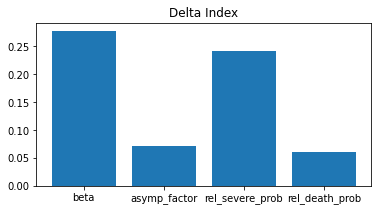

In [5]:
# apply Delta
Si = delta_analyze(problem, X, Y, print_to_console=True)
# plot Delta Moment-Independent Measure of parameters
plt.figure(figsize=(6, 3))
plt.title("Delta Index")
plt.bar(par_list, Si['delta']);